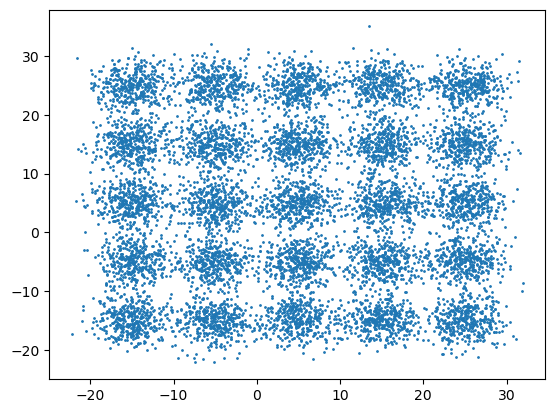

In [16]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from models import rbm

def gaussian_grid(width, height, scale, n_total_samples):
    cov = np.eye(2) * scale
    samples_per_center = int(n_total_samples / (width * height))
    X = []
    for i in range(height):
        for j in range(width):
            mean = np.array([i, j])
            X.append(np.random.multivariate_normal(mean, cov, 
                                                   samples_per_center))
    final = np.vstack(X)
    final[:, 0] -= (height - 1) / 2
    final[:, 1] -= (width - 1) / 2
    return final

X = gaussian_grid(5, 5, 0.05, 10000) * 10 + 5
np.random.shuffle(X)
img = plt.scatter(x=X[:, 0], y=X[:, 1], s=1)

In [3]:
model = rbm.RBM(
    n_vis=2,
    n_hid=20
)
stats = model.fit_autograd(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=400,
    batch_size=100,
    gamma=1,
    gamma_delay=100,
    rng_seed=0,
    verbose_interval=5,
    checkpoint_path=f'{directory_path}/presentation_visualizations/presentation_vid_checkpoints/presentation2.pth'
)

epoch: 000 of 400 | loss: 0.407 | recon_mse: 81.637 | kl_data_model: 5.897 | kl_model_data: 3.323
epoch: 005 of 400 | loss: 0.04 | recon_mse: 21.745 | kl_data_model: 2.051 | kl_model_data: 1.49
epoch: 010 of 400 | loss: 0.016 | recon_mse: 13.318 | kl_data_model: 1.289 | kl_model_data: 1.112
epoch: 015 of 400 | loss: 0.009 | recon_mse: 9.537 | kl_data_model: 0.773 | kl_model_data: 0.7
epoch: 020 of 400 | loss: -0.003 | recon_mse: 7.476 | kl_data_model: 0.637 | kl_model_data: 0.325
epoch: 025 of 400 | loss: -0.005 | recon_mse: 5.706 | kl_data_model: 0.442 | kl_model_data: 0.523
epoch: 030 of 400 | loss: 0.002 | recon_mse: 5.565 | kl_data_model: 0.493 | kl_model_data: 0.413
epoch: 035 of 400 | loss: -0.006 | recon_mse: 4.444 | kl_data_model: 0.658 | kl_model_data: 0.495
epoch: 040 of 400 | loss: -0.001 | recon_mse: 4.012 | kl_data_model: 0.527 | kl_model_data: 0.418
epoch: 045 of 400 | loss: -0.004 | recon_mse: 3.642 | kl_data_model: 0.641 | kl_model_data: 0.404
epoch: 050 of 400 | loss: 

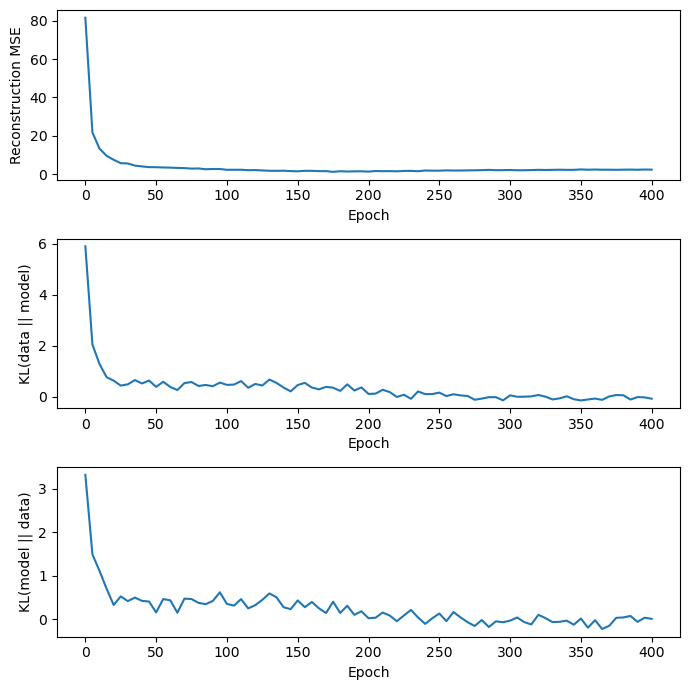

In [4]:
def visualize_learning(stats):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
    axs[0].plot(stats['epoch_num'], stats['recon_mse'])
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Reconstruction MSE')
    axs[1].plot(stats['epoch_num'], stats['kl_data_model'])
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('KL(data || model)')
    axs[2].plot(stats['epoch_num'], stats['kl_model_data'])
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('KL(model || data)')
    plt.tight_layout()
visualize_learning(stats)


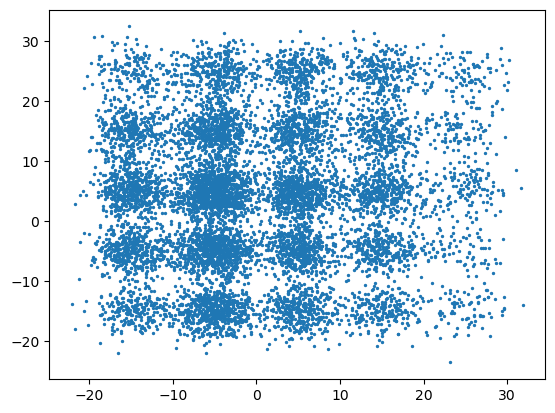

In [13]:
model = rbm.load(f'{directory_path}/presentation_visualizations/presentation_vid_checkpoints/presentation2-399.pth')
samples = model.reconstruct(np.zeros((10000, 2)), n_gibbs=100)
plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)

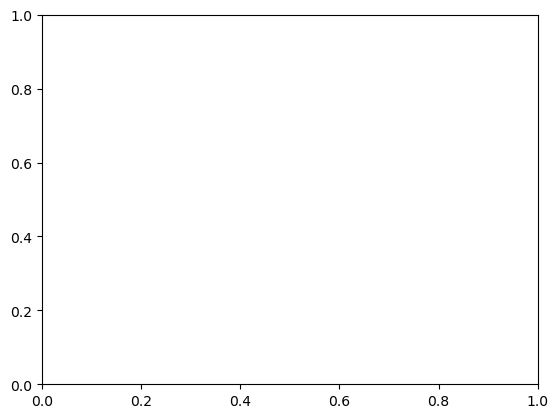

In [14]:
current_axis = plt.gca()
for i in range(401):
    model = rbm.load(f'{directory_path}/presentation_visualizations/presentation_vid_checkpoints/presentation2-{i}.pth')
    samples = model.reconstruct(np.zeros((10000, 2)), n_gibbs=100)
    current_axis.scatter(x=samples[:, 0], y=samples[:, 1], s=1)
    current_axis.set_xlim(-25, 35)
    current_axis.set_ylim(-25, 35)
    plt.savefig(f'{directory_path}/presentation_visualizations/presentation_vid_imgs/pic2-{i}.png')
    current_axis.clear()
None

# Turn png's into video

In [15]:
import cv2
import os

# Directory containing PNG images
input_directory = f'{directory_path}/presentation_visualizations/presentation_vid_imgs'

# Output video file
output_video = f'{directory_path}/presentation_visualizations/output_video.mp4'

# Frame rate (adjust as needed)
frame_rate = 24

# Function to sort files numerically
def sort_files_numerically(files):
    return sorted(files, key=lambda x: int(x.split('.')[0].split('-')[1]))

# Get the list of PNG files in the directory
png_files = [f for f in os.listdir(input_directory) if f.endswith('.png') and f.startswith('pic2')]
png_files = sort_files_numerically(png_files)

# Read the first image to get dimensions
first_image = cv2.imread(os.path.join(input_directory, png_files[0]))
height, width, layers = first_image.shape

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
video = cv2.VideoWriter(output_video, fourcc, frame_rate, (width, height))

# Write each frame to the video
for png_file in png_files:
    image_path = os.path.join(input_directory, png_file)
    frame = cv2.imread(image_path)
    video.write(frame)

# Release the VideoWriter object
video.release()

print(f"Video created: {output_video}")

Video created: /Users/andrewyang/Desktop/adversarialRBMs/demos/rbm_demos/presentation_visualizations/output_video.mp4
